[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%204/Leçon_4_Demo_detr.ipynb)

# ELE8812 - Traitement fréquentielle

## Démo : Filtrage passe-bas, filtres classiques détramage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

Mounted at /content/drive


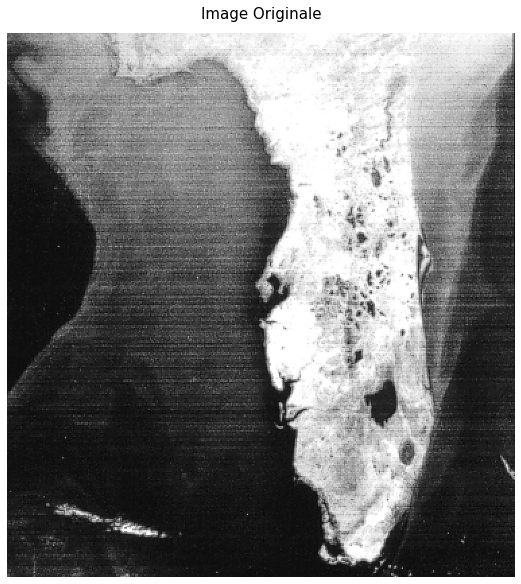

In [3]:
# Charger image
A = plt.imread('Repo/Data/Floride.tif');
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

In [4]:
def filtpb_butter(A, fc, ordre, pad):
    """ Application d'un filtre Butterworth sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    ordre (int): Ordre du filtre
    pad (int): Nombre de pixels de padding
    """
    M,N = A.shape
    M+=pad
    N+=pad

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A, (M,N)))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2

    # Réponse fréquentielle du filtre Butterworth
    HH = 1 / (1 + (D2 / fc**2)**ordre)
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B[:A.shape[0],:A.shape[1]] 

In [5]:
def filtpb_gauss(A, fc, pad):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    pad (int): Nombre de pixels de padding
    """
    M,N = A.shape
    M+=pad
    N+=pad

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A, (M,N)))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # Réponse fréquentielle du filtre gaussien
    HH = np.exp(-D2 / (2 * fc**2))
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B[:A.shape[0],:A.shape[1]]       

In [6]:
def filtpb_idéal(A, fc, pad):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    pad (int): Nombre de pixels de padding
    """
    M,N = A.shape
    M+=pad
    N+=pad

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A, (M,N)))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # Réponse fréquentielle du filtre idéal
    HH = (D2<= fc**2)
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B[:A.shape[0],:A.shape[1]]     

## Paramètres de filtrage

In [7]:
# fréquence de coupure
fc = 40
# padding
pad = 0
# ordre du filtre
n = 4

## Filtrage idéal

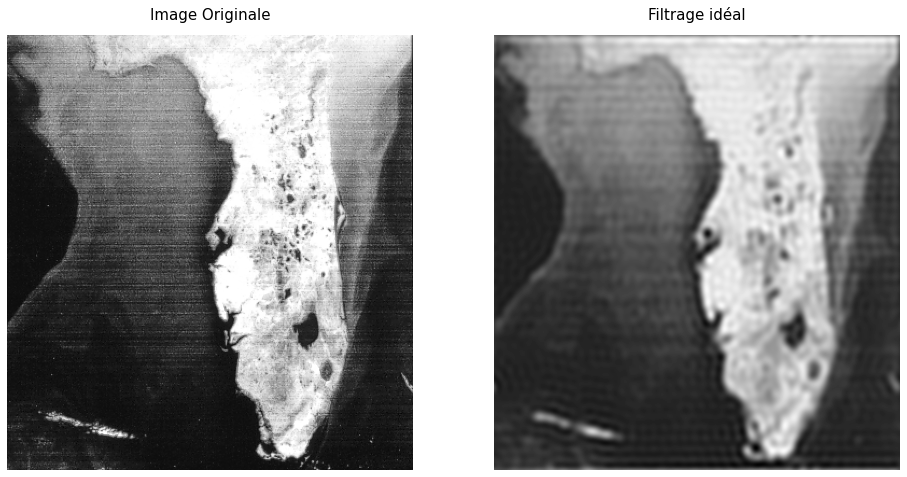

In [8]:
plt.subplot(121); plt.imshow(A, cmap='gray'); plt.axis('off'); plt.title('Image Originale');
plt.subplot(122); plt.imshow(filtpb_idéal(A,fc,pad), cmap='gray'); plt.axis('off'); plt.title('Filtrage idéal');
plt.show()

## Filtrage gaussien

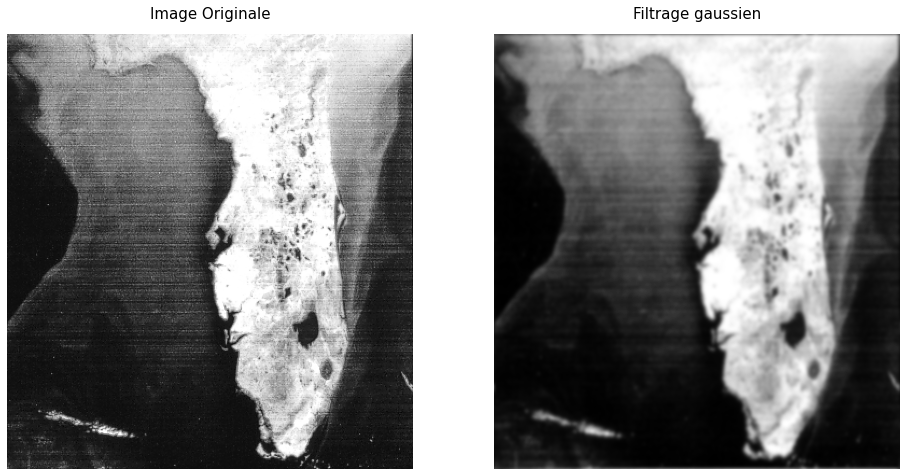

In [ ]:
plt.subplot(121); plt.imshow(A, cmap='gray'); plt.axis('off'); plt.title('Image Originale');
plt.subplot(122); plt.imshow(filtpb_gauss(A,fc,pad), cmap='gray'); plt.axis('off'); plt.title('Filtrage gaussien');
plt.show()

## Filtrage butterworth

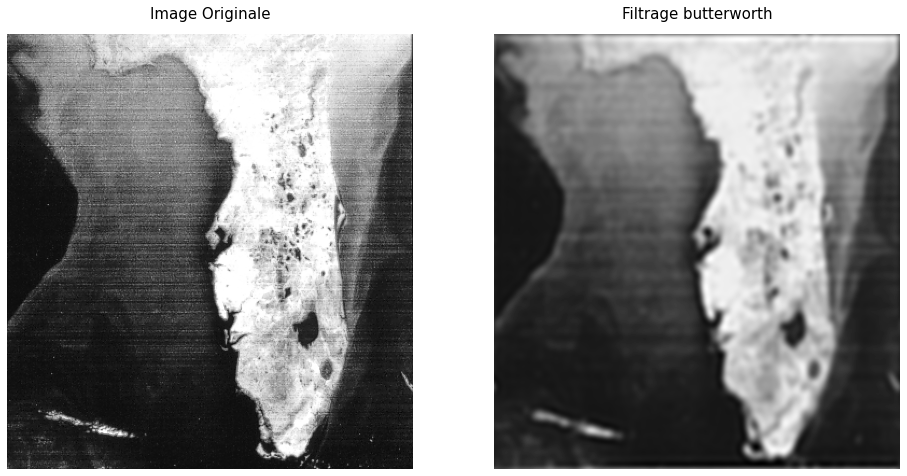

In [ ]:
plt.subplot(121); plt.imshow(A, cmap='gray'); plt.axis('off'); plt.title('Image Originale');
plt.subplot(122); plt.imshow(filtpb_butter(A, fc, n, pad), cmap='gray'); plt.axis('off'); plt.title('Filtrage butterworth');
plt.show()

## Comparaison

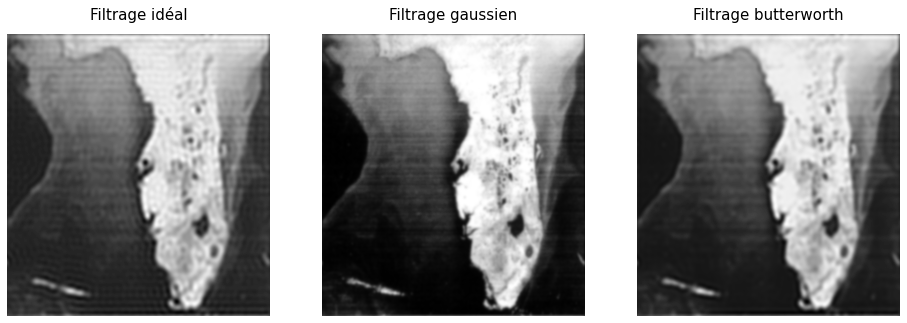

In [ ]:
plt.subplot(131); plt.imshow(filtpb_idéal(A,fc,pad), cmap='gray'); plt.axis('off'); plt.title('Filtrage idéal')
plt.subplot(132); plt.imshow(filtpb_gauss(A,fc,pad), cmap='gray'); plt.axis('off'); plt.title('Filtrage gaussien')
plt.subplot(133); plt.imshow(filtpb_butter(A, fc, n, pad), cmap='gray'); plt.axis('off'); plt.title('Filtrage butterworth')
plt.show()